In [12]:
import pandas as pd
import numpy as np
import re
import glob
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [13]:
data = pd.read_csv('../results/edges.csv',index_col=0)

In [14]:
# add data from random graphs
add_data = {'n_edges':[],'std_edges':[],'params':[],'type':[]}
files = glob.glob('/home/lau/GIT/FRC_Thesis/results/random_graphs_sizes/*.txt')
for f in files:
    edge_list = np.loadtxt(f)
    add_data['n_edges'].append(np.average(edge_list))
    add_data['std_edges'].append(np.std(edge_list))
    params = re.split('/',f)[-1]
    add_data['params'].append(params[:-4])
    add_data['type'].append('XREF')
add = pd.DataFrame(add_data)
data = data.append(add)#,ignore_index = True

In [15]:
data

,n_edges,std_edges,params,type
0,736.00,0.000000,100N_0.125V/E,power
1,730.10,2.300000,100N_0.125V/E,power
2,723.80,4.935585,100N_0.125V/E,power
3,722.40,2.244994,100N_0.125V/E,power
4,722.70,3.100000,100N_0.125V/E,power
...,...,...,...,...
15,1612.17,39.702659,500N_0.3125VE,XREF
16,268.69,15.023778,100N_0.375VE,XREF
17,530.73,19.352961,100N_0.1875VE,XREF
18,3205.94,54.074915,1000N_0.3125VE,XREF


In [17]:

# create collumn expected number of edges\
def to_expected(string):
    x = string.split("_")
    numbers = '[-+]?\d*\.\d+|\d+'
    ints = [float(re.findall(numbers,i)[0]) for i in x]
    return ints[0]/ints[1]

def max_edges(string):
    x = string.split("_")
    numbers = '[-+]?\d*\.\d+|\d+'
    ints = [float(re.findall(numbers,i)[0]) for i in x]
    N = ints[0]
    return N*(N-1)/2

data['Expected Edges'] = data.params.apply(to_expected)
data['Possible_Edges'] = data.params.apply(max_edges)
data['Edges'] = data['n_edges']
data['Edges'] = data['Edges']/data['Possible_Edges']
data['Expected Edges'] = data['Expected Edges']/data['Possible_Edges']
# data.drop('Unnamed: 0')

In [18]:
data = data.drop('params',axis = 1)
data = data.drop('n_edges',axis = 1)
data = data.groupby(['type','Expected Edges'],as_index = False).mean()

In [19]:
data = data.sort_values(['type','Expected Edges'],ignore_index = True)
data

,type,Expected Edges,std_edges,Possible_Edges,Edges
0,BA,0.005339,0.000000,499500.0,0.003996
1,BA,0.006406,0.000000,499500.0,0.005988
2,BA,0.008008,0.000000,499500.0,0.007976
3,BA,0.010677,0.000000,499500.0,0.009960
4,BA,0.010688,0.000000,124750.0,0.007984
...,...,...,...,...,...
135,power,0.064646,0.702442,4950.0,0.058665
136,power,0.080808,1.149820,4950.0,0.077180
137,power,0.091429,3.413238,15400.0,0.086469
138,power,0.107744,1.459997,4950.0,0.095216


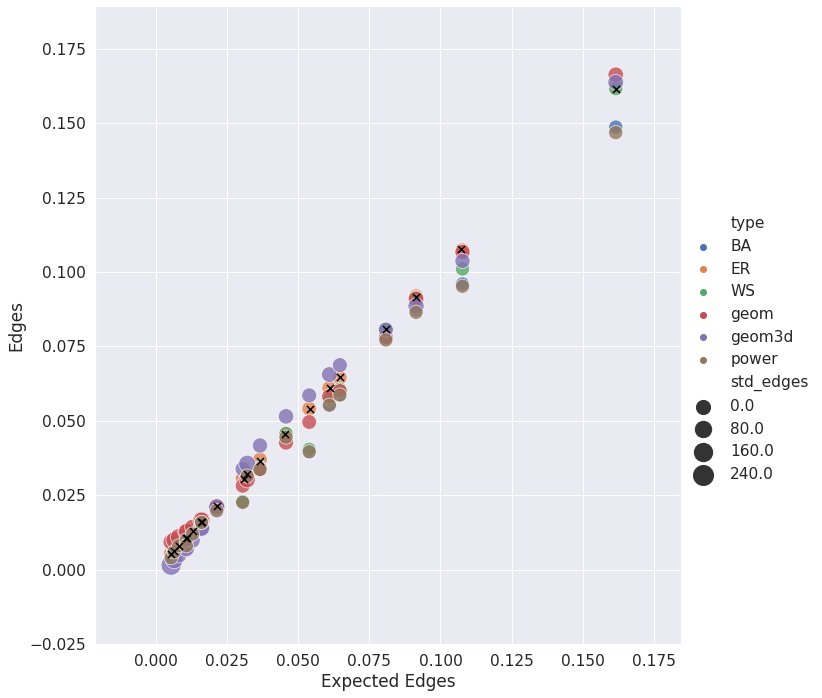

In [21]:
not_ref = data[data["type"] != "XREF"]
fg = sns.relplot(x = "Expected Edges", y = "Edges",size = "std_edges",kind = 'scatter',
                data = not_ref,sizes = (200,400),hue = "type",alpha=.8,height = 10,
                facet_kws={'sharey': False, 'sharex': False})
ref = data[data["type"] == "XREF"]
fg.axes[0,0].scatter(ref["Edges"], ref["Expected Edges"],marker = 'x',c = 'black', s = 50)

In [36]:
x ='100N_0.345V/E'
to_expected(x)
#re.findall('\d+',x[0])

289.8550724637681

In [37]:
100/.345

289.8550724637681